# Concrete Compressive Strength Prediction

Concrete is one of the most important materials in Civil Engineering. Knowing the compressive strength of concrete is very important when constructing a building or a bridge. The Compressive Strength of Concrete is a highly nonlinear function of ingredients used in making it and their characteristics. Thus, using Machine Learning to predict the Strength could be useful in generating a combination of ingredients which result in high Strength.

###  Problem Statement
Predicting Compressive Strength of Concrete given its age and quantitative measurements of ingredients.

### Data Description
Data is obtained from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Number of instances - 1030
Number of Attributes - 9
Attribute breakdown - 8 quantitative inputs, 1 quantitative output


### Attribute information

##### Inputs
- Cement
- Blast Furnace Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate

( All above features measured in kg/m^31)
- Age (in days)


##### Output
Concrete Compressive Strength (Mpa)

##### Importing Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Loading the Data

In [105]:
data = pd.read_excel("Concrete_Data.xls")

In [106]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [107]:
len(data)

1030

##### Simplifying Column names, since they appear to be too lengthy.

In [108]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

In [109]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


##### Checking for 'null' values

In [110]:
data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

There are no null values in the data.

### Exploratory Data Analysis
Exploring the data.

In [111]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


##### Checking the pairwise relations of Features.

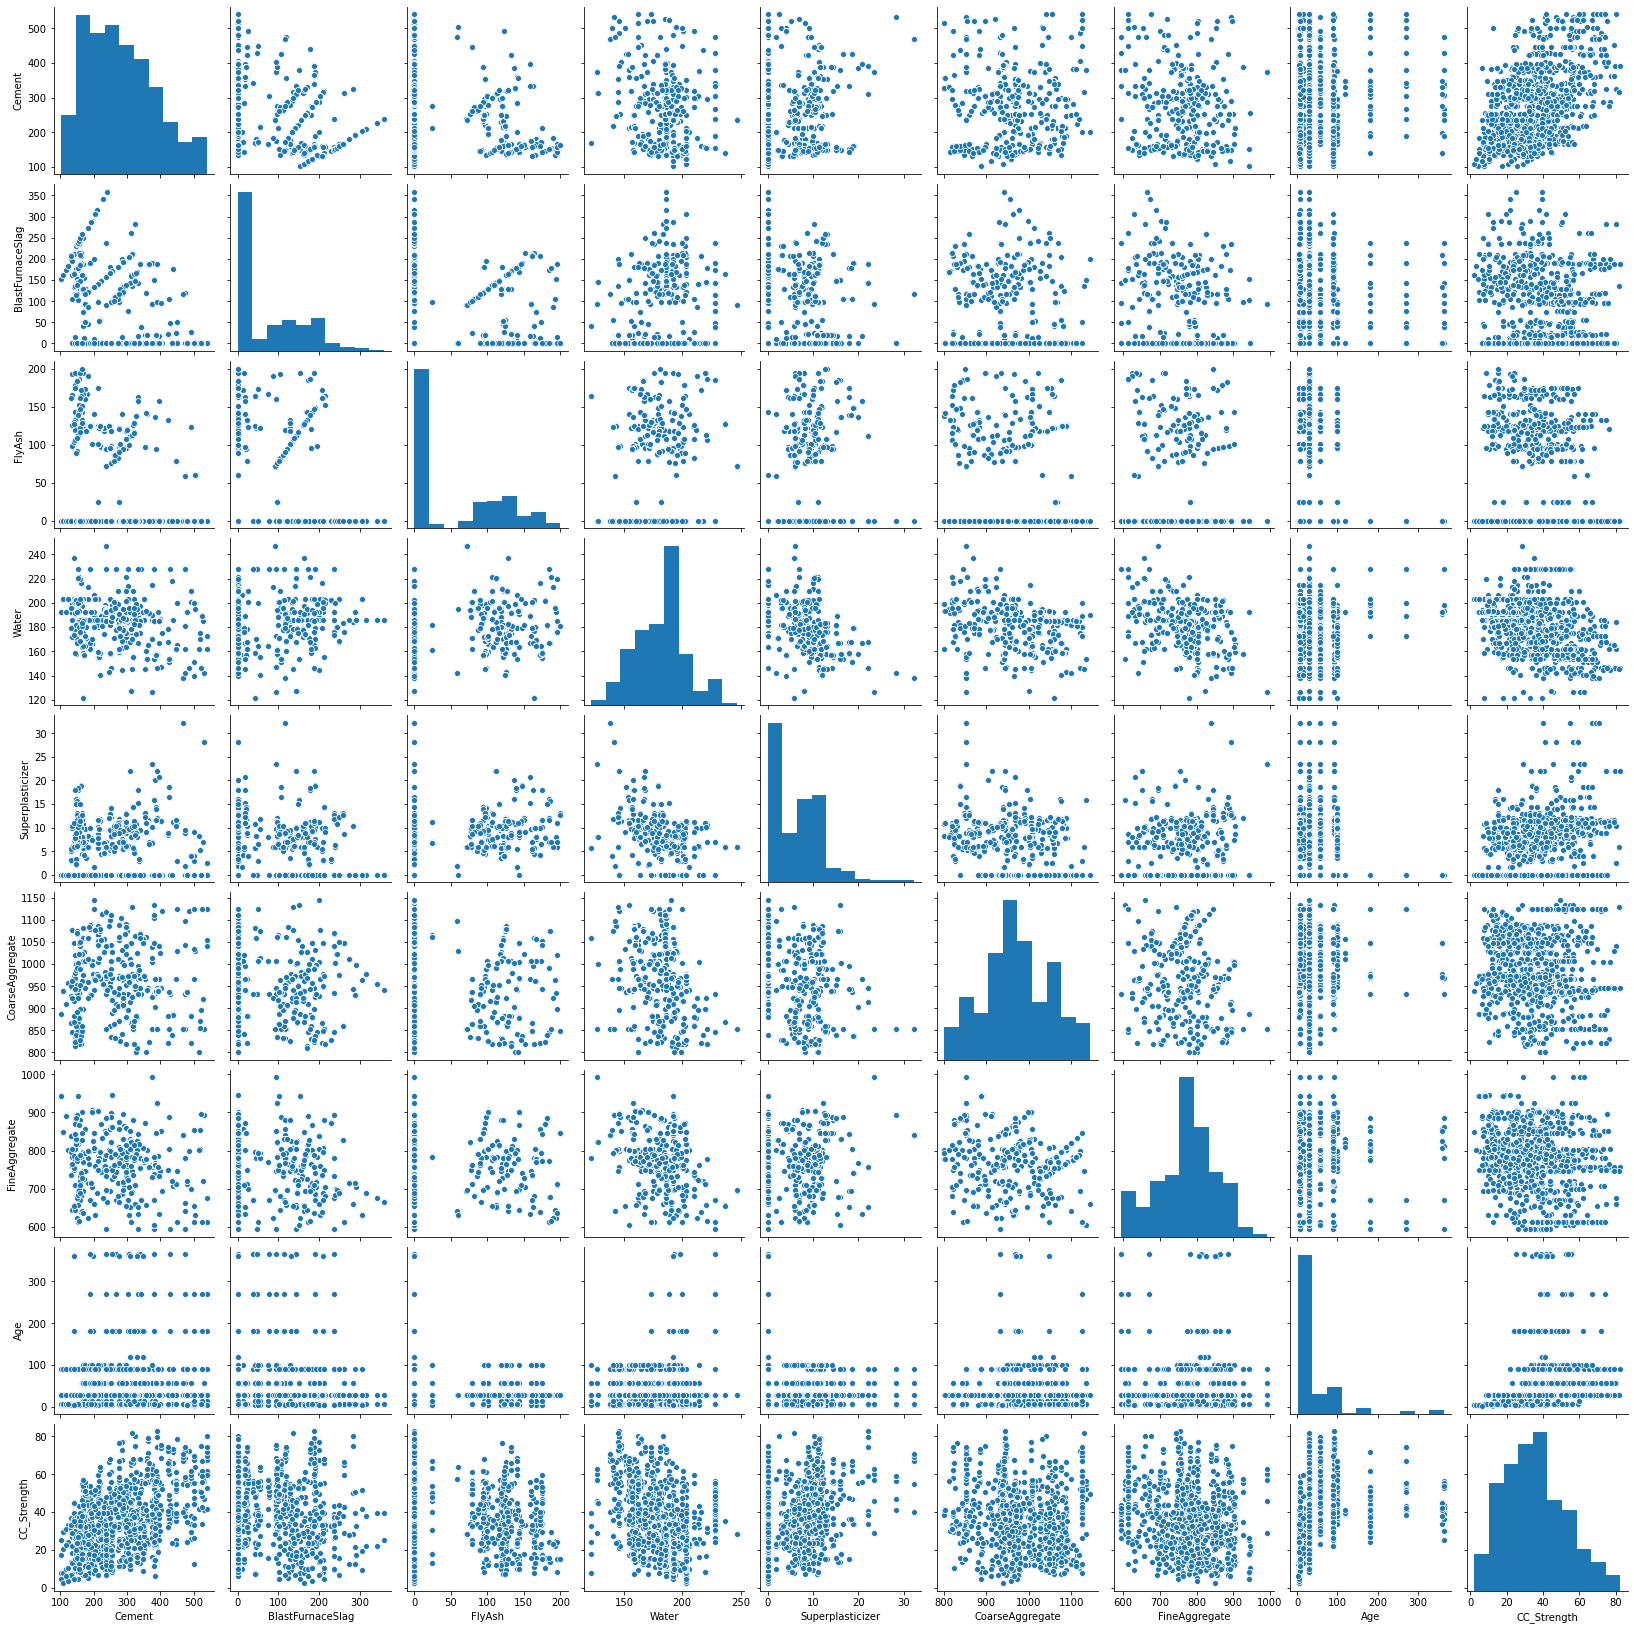

In [112]:
sns.pairplot(data)
plt.show()

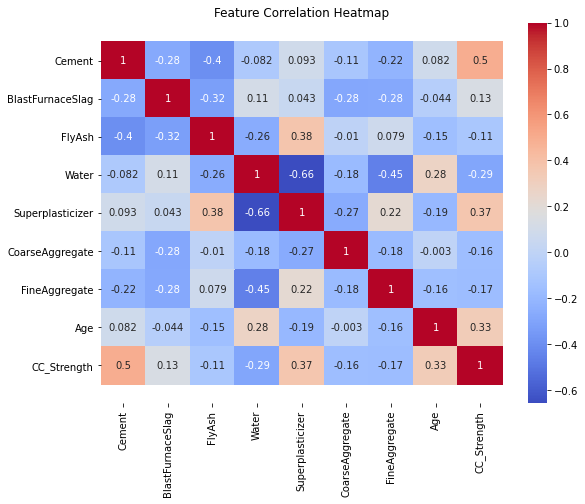

In [113]:
corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Observations
- There are'nt any **high** correlations between **Compressive strength** and other features except for **Cement**, which should be the case for more strength.
- **Age** and **Super plasticizer** are the other two features which are strongly correlated with **Compressive Strength**.
- **Super Plasticizer** seems to have a negative high correlation with **Water**, positive correlations with **Fly ash** and **Fine aggregate**.


We can further analyze these correlations visually by plotting these relations.

In [114]:
data.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

Text(0.5, 1.0, 'Compressive Strength Distribution')

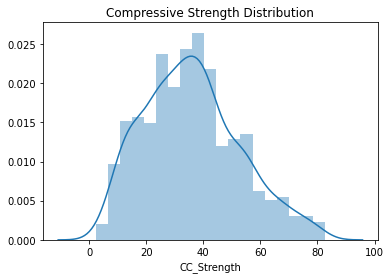

In [115]:
ax = sns.distplot(data.CC_Strength)
ax.set_title("Compressive Strength Distribution")

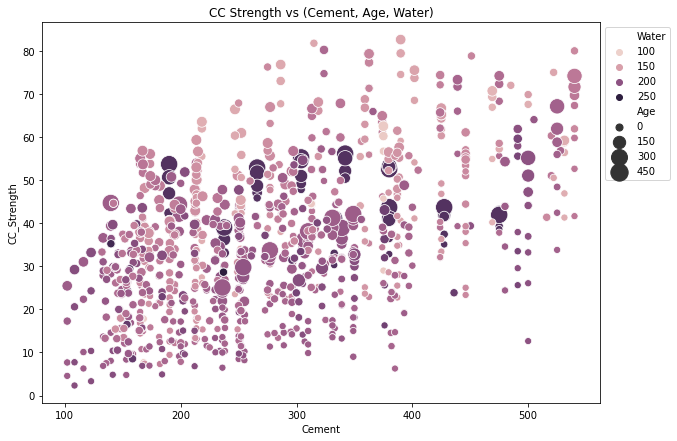

In [116]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="Cement", hue="Water", size="Age", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

## Observations from Strength vs (Cement, Age, Water)
- Compressive strength increases with amount of cement
- Compressive strength increases with age
- Cement with low age requires more cement for higher strength
- The older the cement is the more water it requires
- Concrete strength increases when less water is used in preparing it

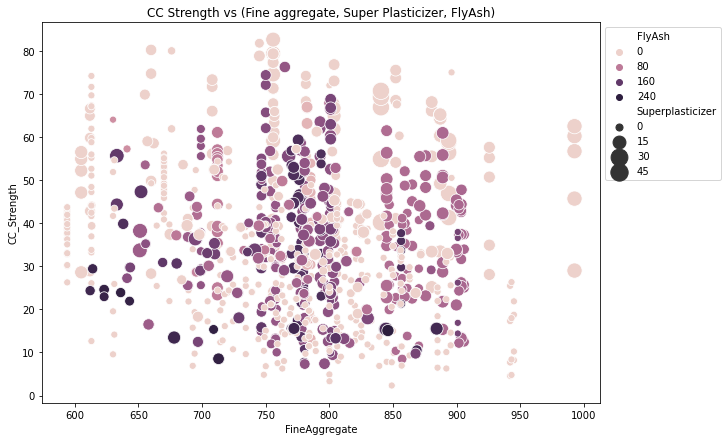

In [117]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="FlyAsh", size="Superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

## Observations from CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)
- As Flyash increases the strength decreases
- Strength increases with Super plasticizer

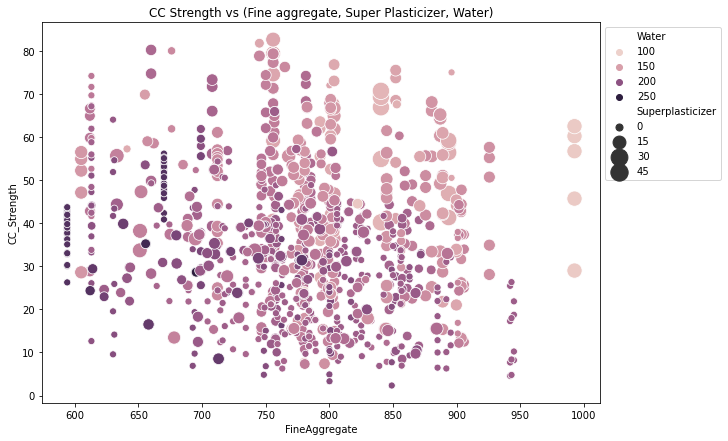

In [118]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="Water", size="Superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, Water)
- Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)
- More Fine aggregate is used when less water, more Super plasticizer is used.

# Data Preprocessing

##### Separating Input Features and Target Variable.

In [119]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column


##### Splitting Data into Training and Text splits

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

##### Scaling
Standardizing the data i.e. to rescale the fearures to have a mean of zero and standard deviation of 1 

In [122]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

Training Machine Learning Algorithms on the training data and making predictions on Test data.

### Linear Regression
- The algorithm assigns coefficeints to each input feature to form a linear relation between input features and target variable, so as to minimize a objective function.
- The objective function used in this case is Mean Squared Error.

In [123]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()

In [124]:
lr.fit(X_train, y_train)

LinearRegression()

##### Model Evaluation


In [125]:
#print the intercept
print(lr.intercept_)

35.96274673130088


In [126]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Cement,12.665022
BlastFurnaceSlag,8.741348
FlyAsh,5.502169
Water,-3.768875
Superplasticizer,1.575109
CoarseAggregate,0.981221
FineAggregate,1.178070
Age,7.248813


##### Regression Evaluation Metrics

In [127]:
predictions = lr.predict(X_test)

In [128]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.22706518387599
MSE: 105.78215736153295
RMSE: 10.285045326177856


###### Plotting Predictions

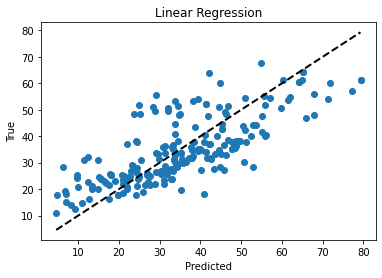

In [129]:
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Linear Regression")
plt.show()

###### Residual Histogram

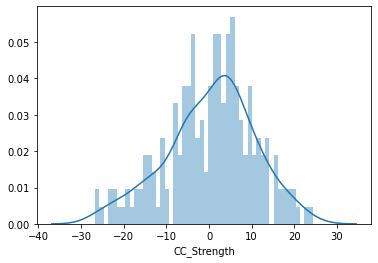

In [130]:
sns.distplot((y_test-predictions),bins=50);

## Decision Trees
Another algorithm that would give better performance in this case would be Decision Trees, since we have a lot of zeros in some of the input features as seen from their distributions in the pair plot above. This would help the decision trees build trees based on some conditions on features which can further improve performance

In [131]:
from sklearn.tree import DecisionTreeRegressor

In [132]:
dtr = DecisionTreeRegressor()

In [133]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [134]:
predictions1= dtr.predict(X_test)

##### Plotting Predictions

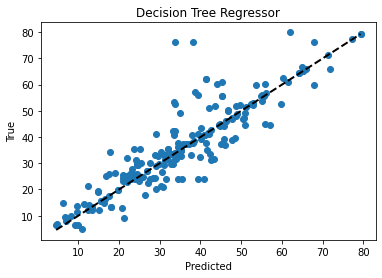

In [135]:
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

##### Evaluation Metrics

In [136]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 4.522114979499793
MSE: 54.48857132068003
RMSE: 7.381637441698151


# Random Forest Regressor
Since Using a Decision Tree Regressor has improved our performance, we can further improve the performance by ensembling more trees. Random Forest Regressor trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust.

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
rfr = RandomForestRegressor(n_estimators=100)

In [139]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
predictions2= rfr.predict(X_test)

###### Plotting Predictions

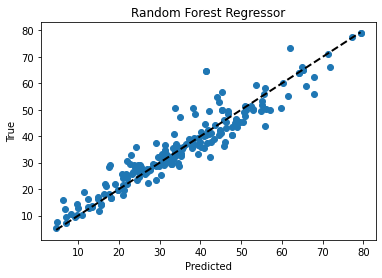

In [141]:
plt.scatter(y_test, predictions2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

##### Evaluation Metrics

In [142]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 3.453279183582608
MSE: 25.95989134439362
RMSE: 5.095085018367566


## Comparison

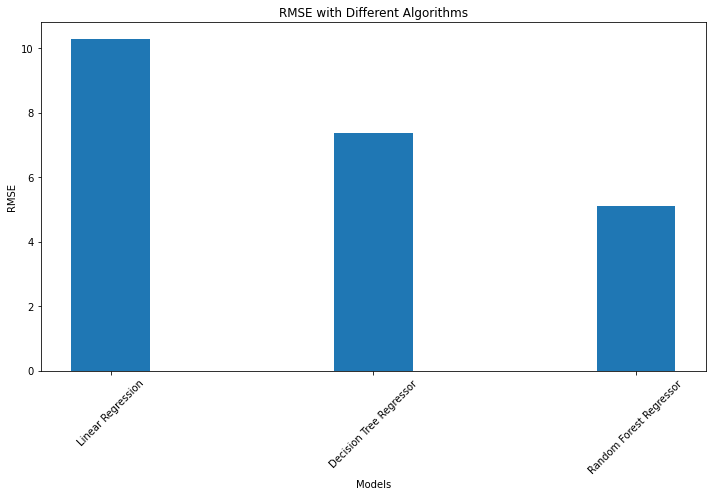

In [143]:
models = [lr, dtr, rfr]
names = ["Linear Regression","Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
fig.tight_layout()
plt.show()

## Conclusion
**Random Forest Regressor** is the best choice for this problem